# z0

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
def KMeans(K,X):
    d,N = X.shape
    change = True
    R = X[:,np.random.randint(0,N,K)]
    M = np.zeros((N, K))
    while change:
        dists = -2 * ( X.T @ R) + np.sum(R ** 2, axis=0, keepdims=True)
        m = np.argmin(dists, axis =1)
        M2 = np.take(np.eye(K), m, axis=0).astype(int)
        change = not np.array_equal(M,M2)
        M = M2
        centers = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1)
    return centers, m
    

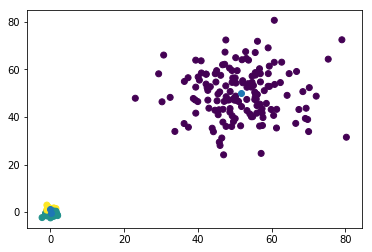

In [65]:
x = np.zeros((2,250))
x[:,:50] = np.random.randn(2,50)
x[:,50:100] = np.random.randn(2,50)
x[:,100:] = np.random.randn(2,150)*10+ 50
# x = x.T
# KMeans(3,x)

R,m = KMeans(3,x)
plt.scatter(x[0], x[1], c=m)
plt.scatter(R[0],R[1])




[[5.65384615 6.68       5.00392157]
 [1.41282051 1.85833333 0.25882353]]


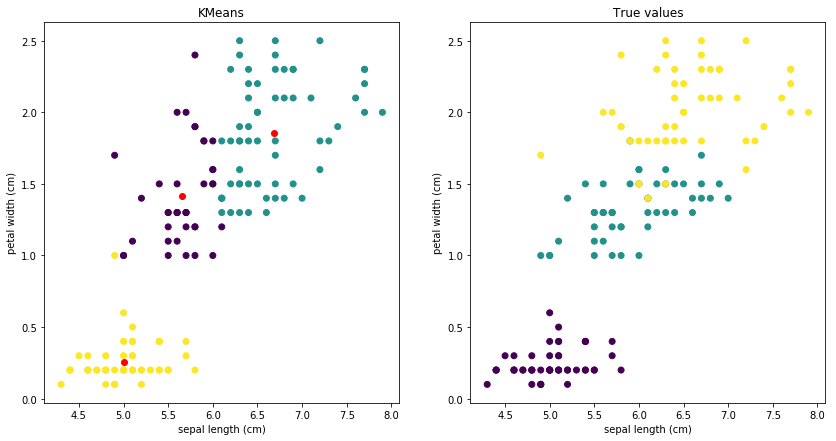

In [36]:
iris = datasets.load_iris()
irisData = np.array(iris.data).T
R, m = KMeans(3, irisData[[0,3],:])
print(R)
plt.figure(figsize=(14, 7))
plt.subplot(121)
plt.scatter(irisData[0,:], irisData[3,:],c=m)
plt.scatter(R[0,:],R[1,:], c = 'red')

plt.title("KMeans")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
# plt.show()
plt.subplot(122)

plt.scatter(irisData[0,:],irisData[3,:],c=iris.target)
plt.title("True values")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[3])
plt.show()

In [42]:
type(iris.feature_names)


list

# z3

In [126]:
irisTypes={b'Iris-setosa':0, b'Iris-versicolor': 1, b'Iris-virginica': 2}
irisData = np.loadtxt("datasets/Iris/data", delimiter=',', converters = {4: lambda x: irisTypes[x]})
irisLabel = open("datasets/Iris/index").read().split('\n')
print(irisData.shape)
irisLabel

wineData = np.loadtxt("datasets/Wine/data", delimiter=',')
wineLabel = open("datasets/Wine/index").read().split('\n')
wineData
wineLabel

cancerData = np.loadtxt("datasets/Cancer/data", delimiter=',', converters = {6: lambda x: -1 if x==b'?' else x})
cancerLabel = open("datasets/Cancer/index").read().split('\n')
cancerData
cancerLabel

forestValues = {b'apr':4, b'aug':8, b'dec':12, b'feb':2, b'fri':5, b'jan':1, b'jul':7, b'jun':6, b'mar':3, b'may':5, b'mon':1, b'nov':11, b'oct':10, b'sat':6, b'sep':9, b'sun':7, b'thu':4, b'tue':2, b'wed':3}
forrF = lambda x: forestValues[x]
forestData = np.loadtxt("datasets/Forest/data", delimiter=',', converters = {2:forrF, 3: forrF})
forestLabel = open("datasets/Forest/index").read().split('\n')
forestData
forestLabel

abaloneSex = {b'M': 0, b'F':1, b'I':2}
abaloneData = np.loadtxt("datasets/Abalone/data", delimiter=',', converters = {0: lambda x: abaloneSex[x]})
abaloneLabel = open("datasets/Abalone/index").read().split('\n')
abaloneData.shape
# abaloneLabel

(150, 5)


(4177, 9)

In [170]:
def plotData(data, dataClass, dataLabels, name=''):
    size = data.shape[1]
    f, axarr = plt.subplots(size, size)
    for y in range(0, size):
        for x in range(0, size):
            if(x != y):
                axarr[x][y].scatter(data[:, x], data[:, y], c= dataClass)
                
    for x in range(0, size):
        axarr[x][x].hist(data[:, x], normed=None, histtype='bar',
                         facecolor='blue', alpha=0.75, ec='black')
        axarr[size-1][x].set_xlabel(dataLabels[x])
        axarr[x][0].set_ylabel(dataLabels[x])

    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 40
    fig_size[1] = 40
    plt.rcParams["figure.figsize"] = fig_size
    f.suptitle(name, fontsize=50)
    if name != '':
        f.savefig(name+'.png')
    plt.show()


In [ ]:
def plotDataKM(data, dataClass, dataLabels, name='', groups=3):
    size = data.shape[1]
    f, axarr = plt.subplots(size, 2*size)
    for y in range(0, size):
        for x in range(0, size):
            if(x != y):
                axarr[x][y].scatter(data[:, x], data[:, y], c= dataClass)
                
                R, m = KMeans(groups, data.T[[x,y],:])
                axarr[x][y+size].scatter(data[:, x], data[:, y], c= m)
                axarr[x][y+size].scatter(R[0,:],R[1,:], c = 'red')
                
    for x in range(0, size):
        axarr[x][x].hist(data[:, x], normed=None, histtype='bar',
                         facecolor='blue', alpha=0.75, ec='black')
        
        axarr[x][x+size].hist(data[:, x], normed=None, histtype='bar',
                              facecolor='blue', alpha=0.75, ec='black')
        
        axarr[size-1][x].set_xlabel(dataLabels[x])
        axarr[x][0].set_ylabel(dataLabels[x])
        axarr[size-1][x+size].set_xlabel(dataLabels[x])


    # Get current size
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 80
    fig_size[1] = 40
    plt.rcParams["figure.figsize"] = fig_size
    f.suptitle(name, fontsize=50)
    if name != '':
        f.savefig(name+'-KM.png')
    plt.show()


In [ ]:
plotDataKM(irisData[:,:4], irisData[:, 4], irisLabel, 'Iris')
plotDataKM(wineData[:,1:13], wineData[:, 0], wineLabel[1:], 'Wine', )
plotDataKM(forestData[:,:13], np.zeros(517), forestLabel, 'Forest')
plotDataKM(cancerData[:,1:10], cancerData[:, 10], cancerLabel[1:], 'Cancer', 2)
plotDataKM(abaloneData[1:,:8], abaloneData[:, 8], abaloneLabel, 'Abalone', 29)

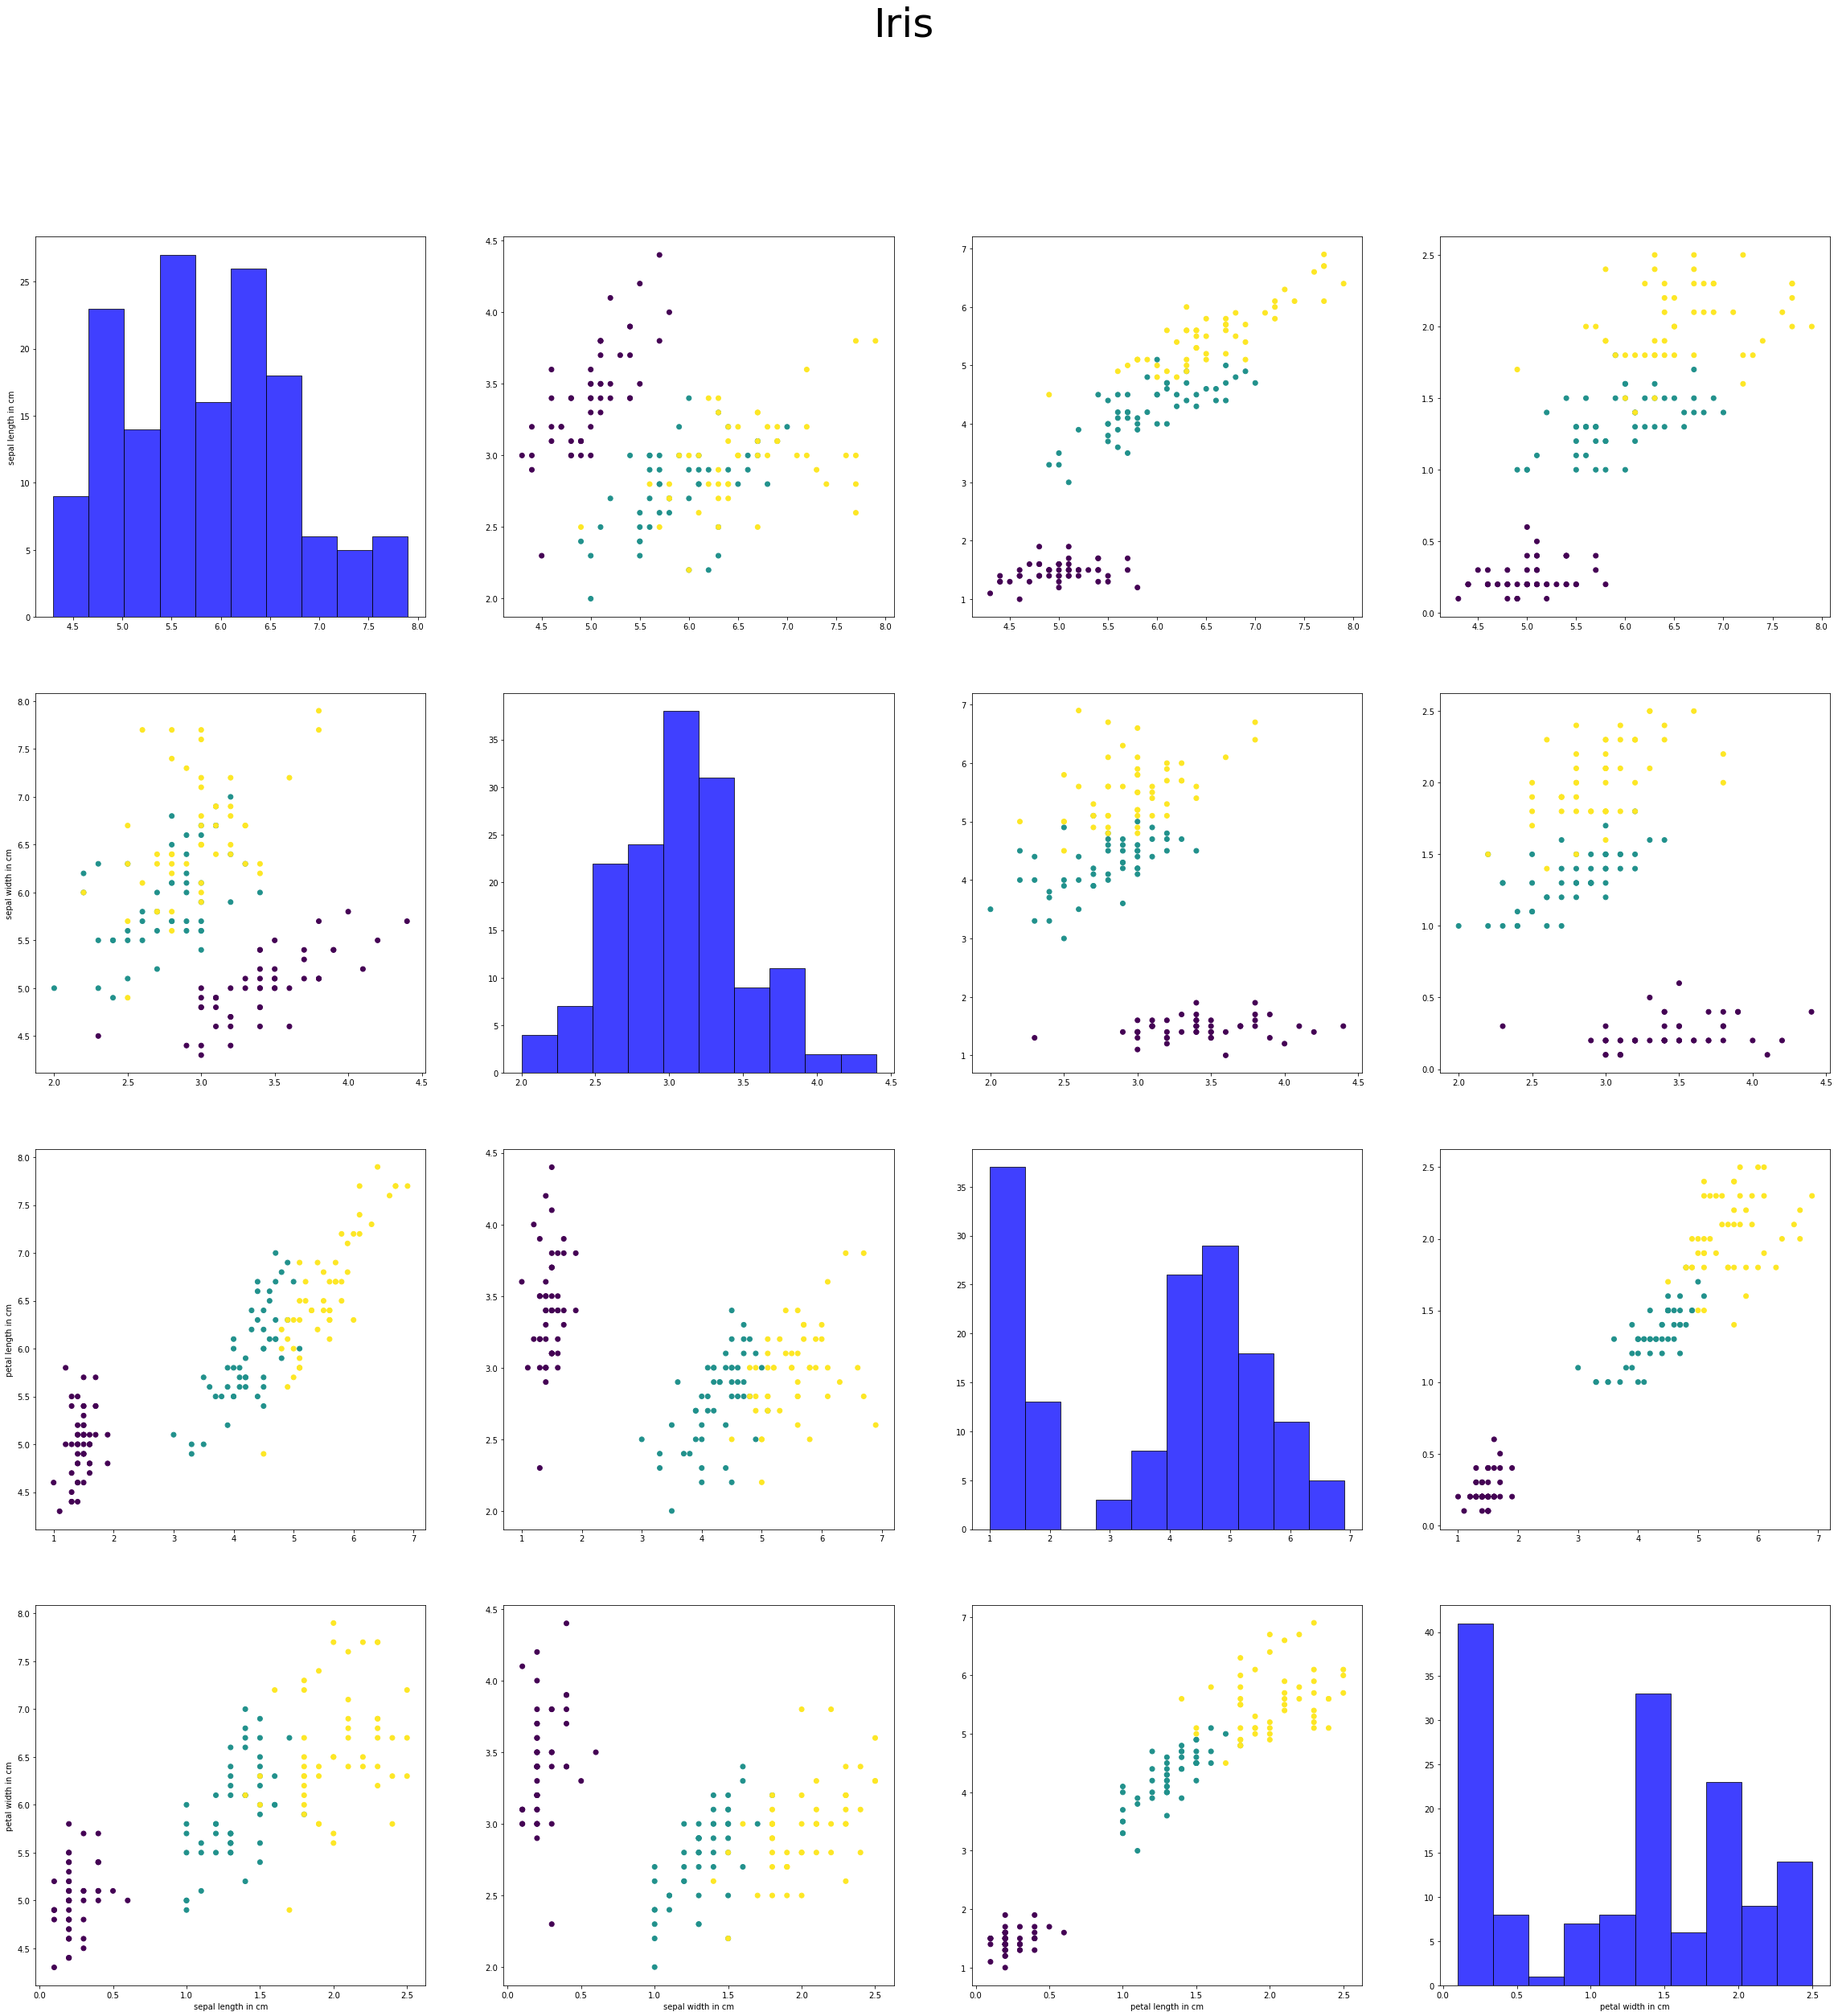

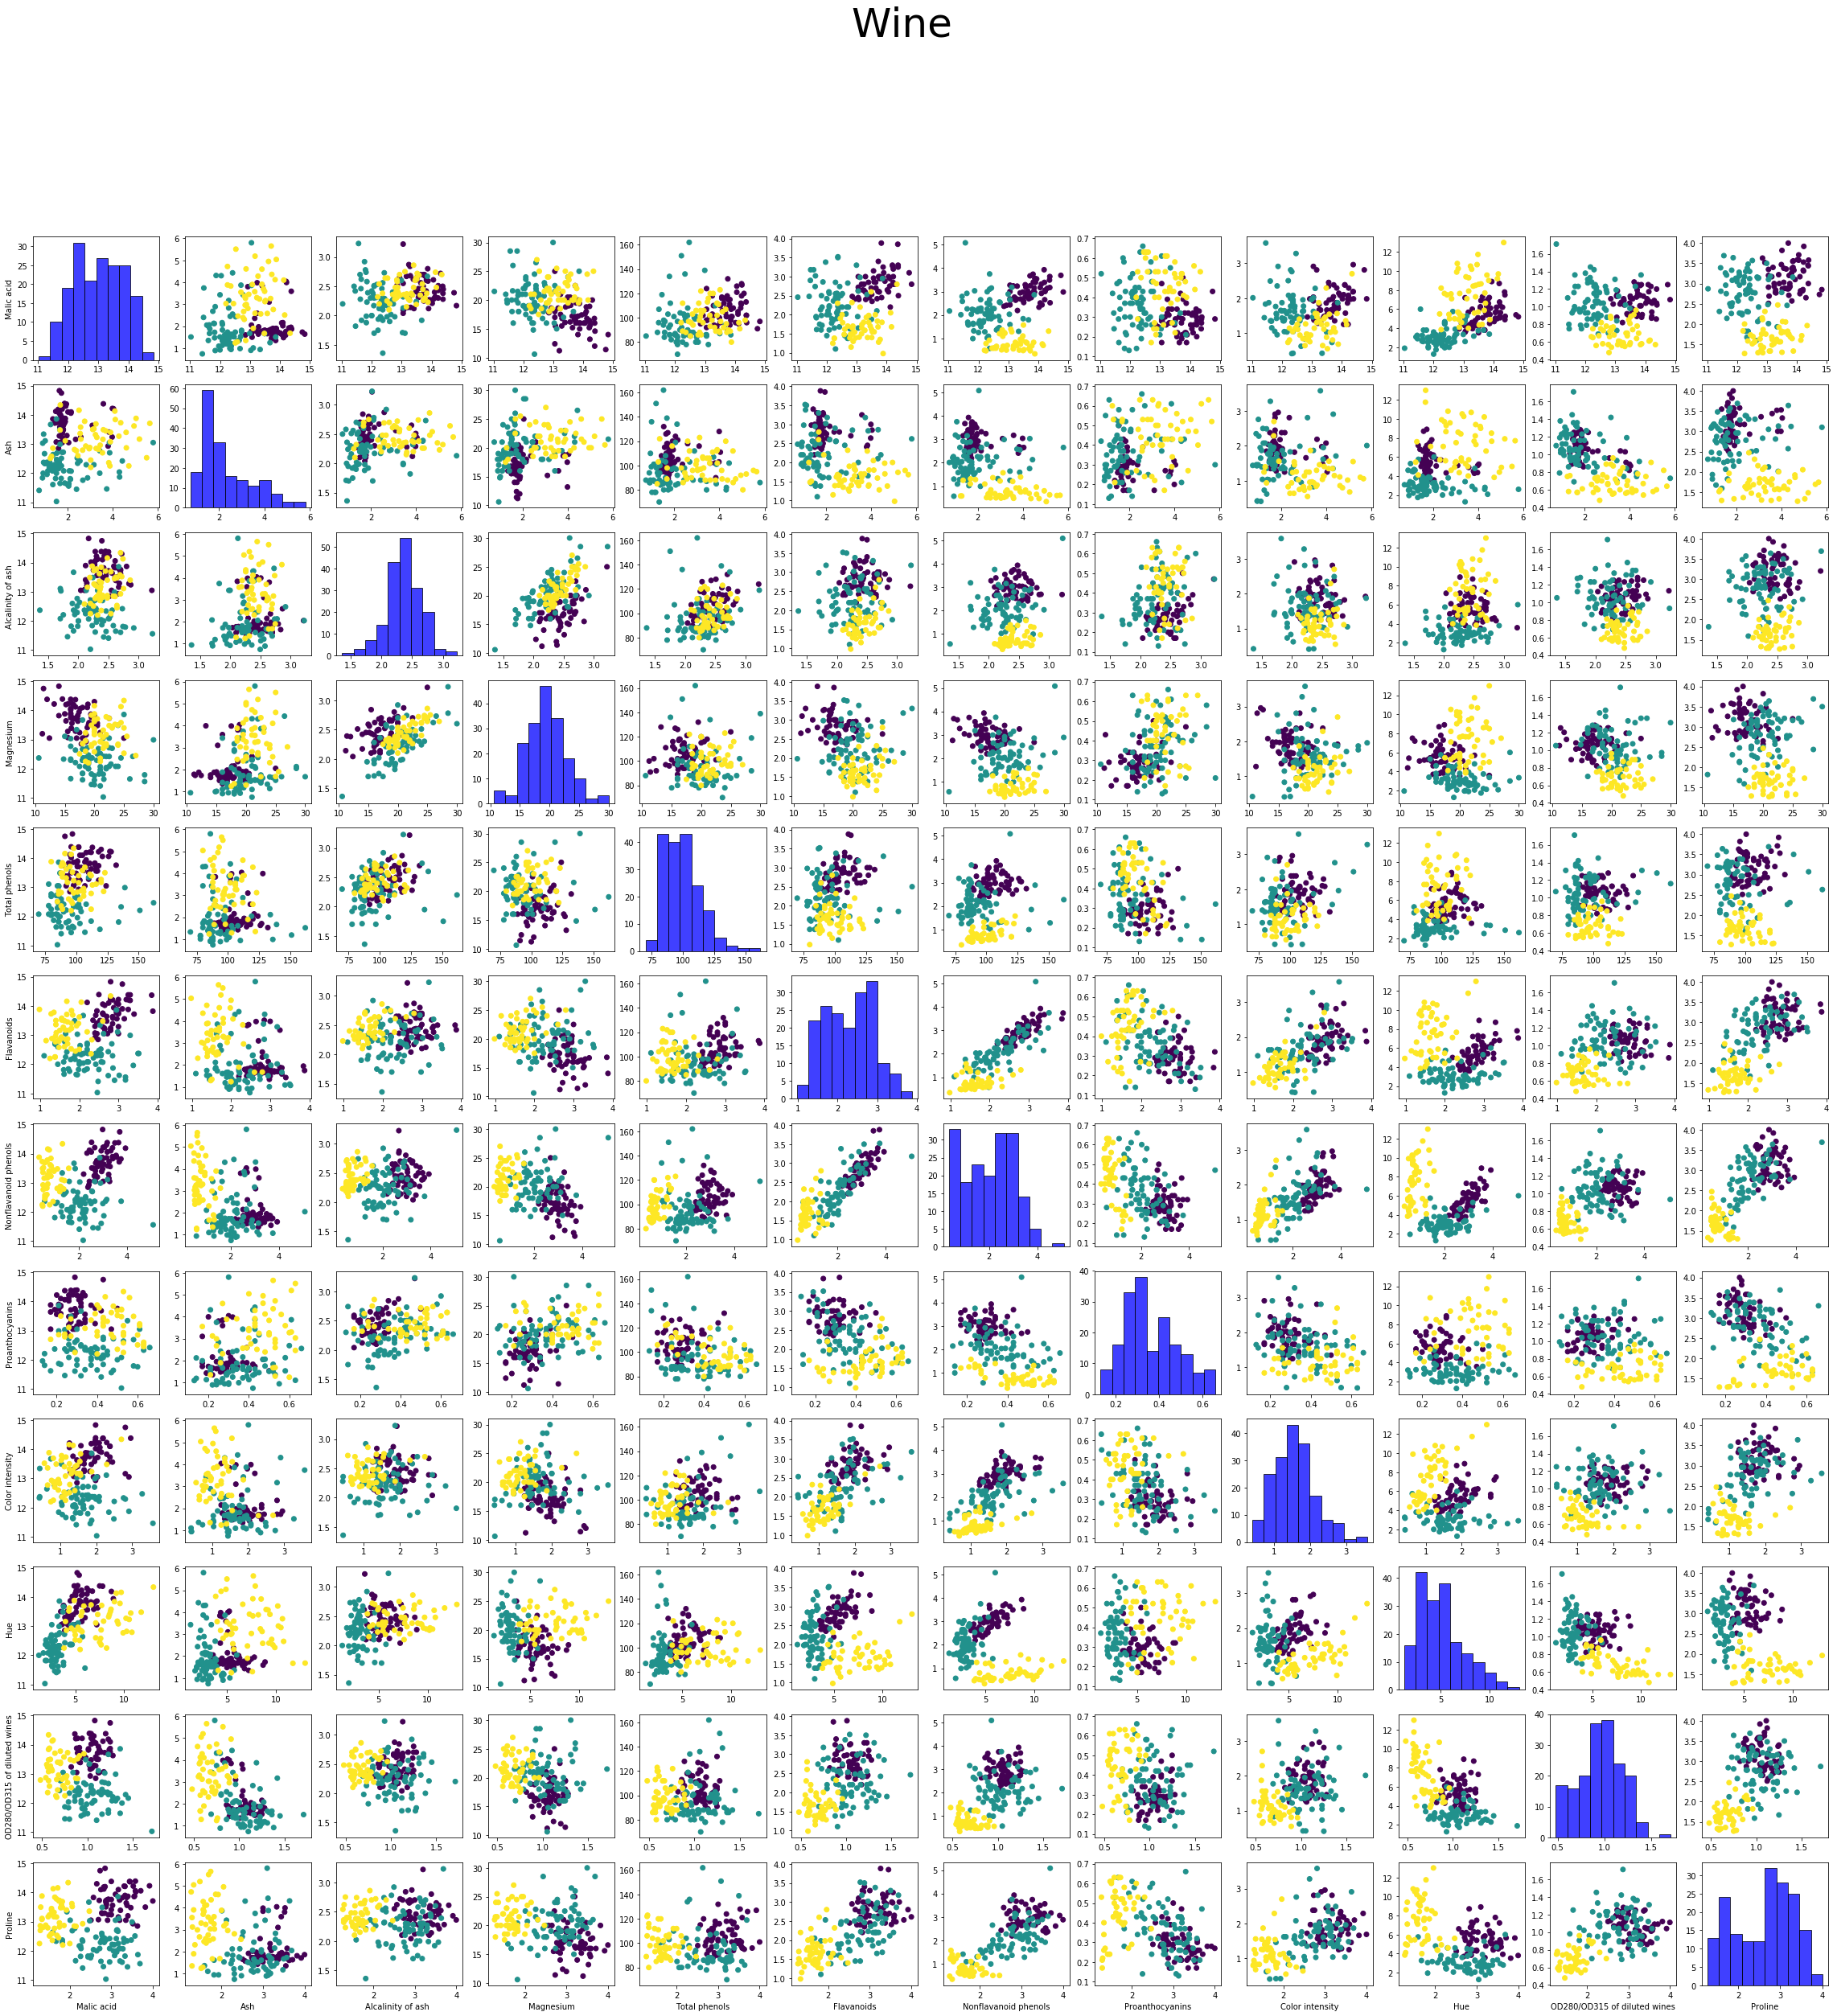

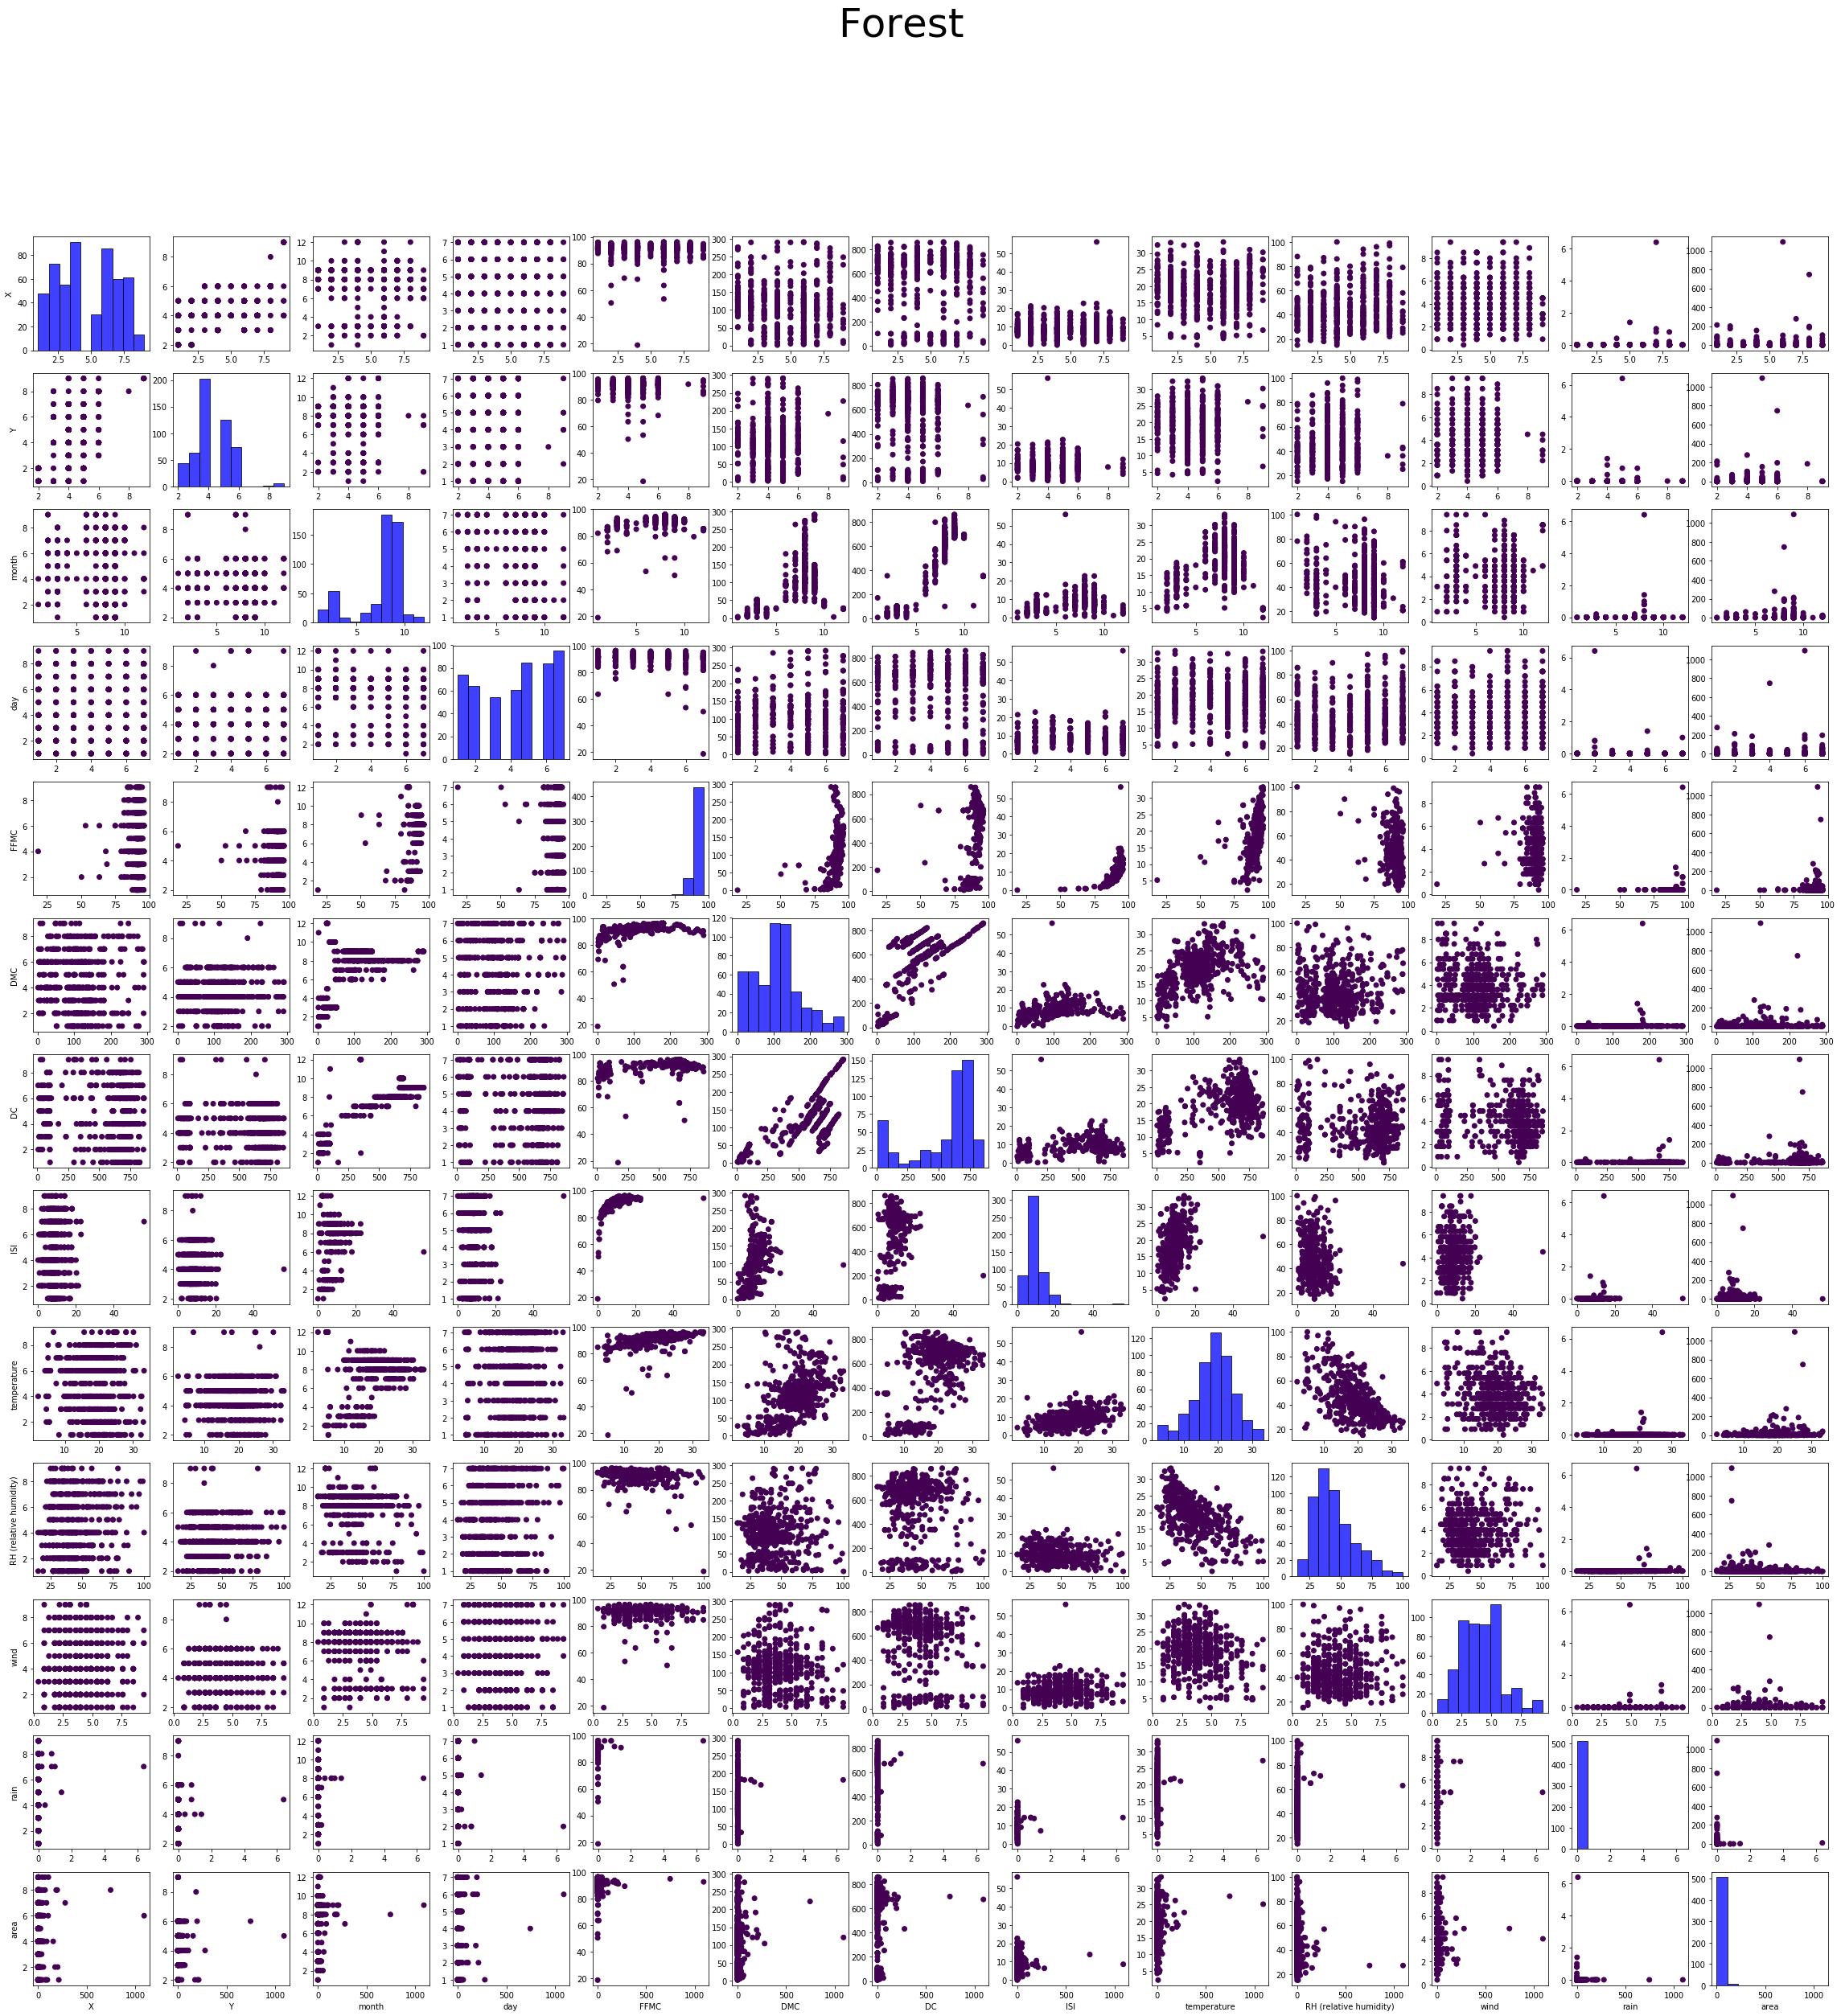

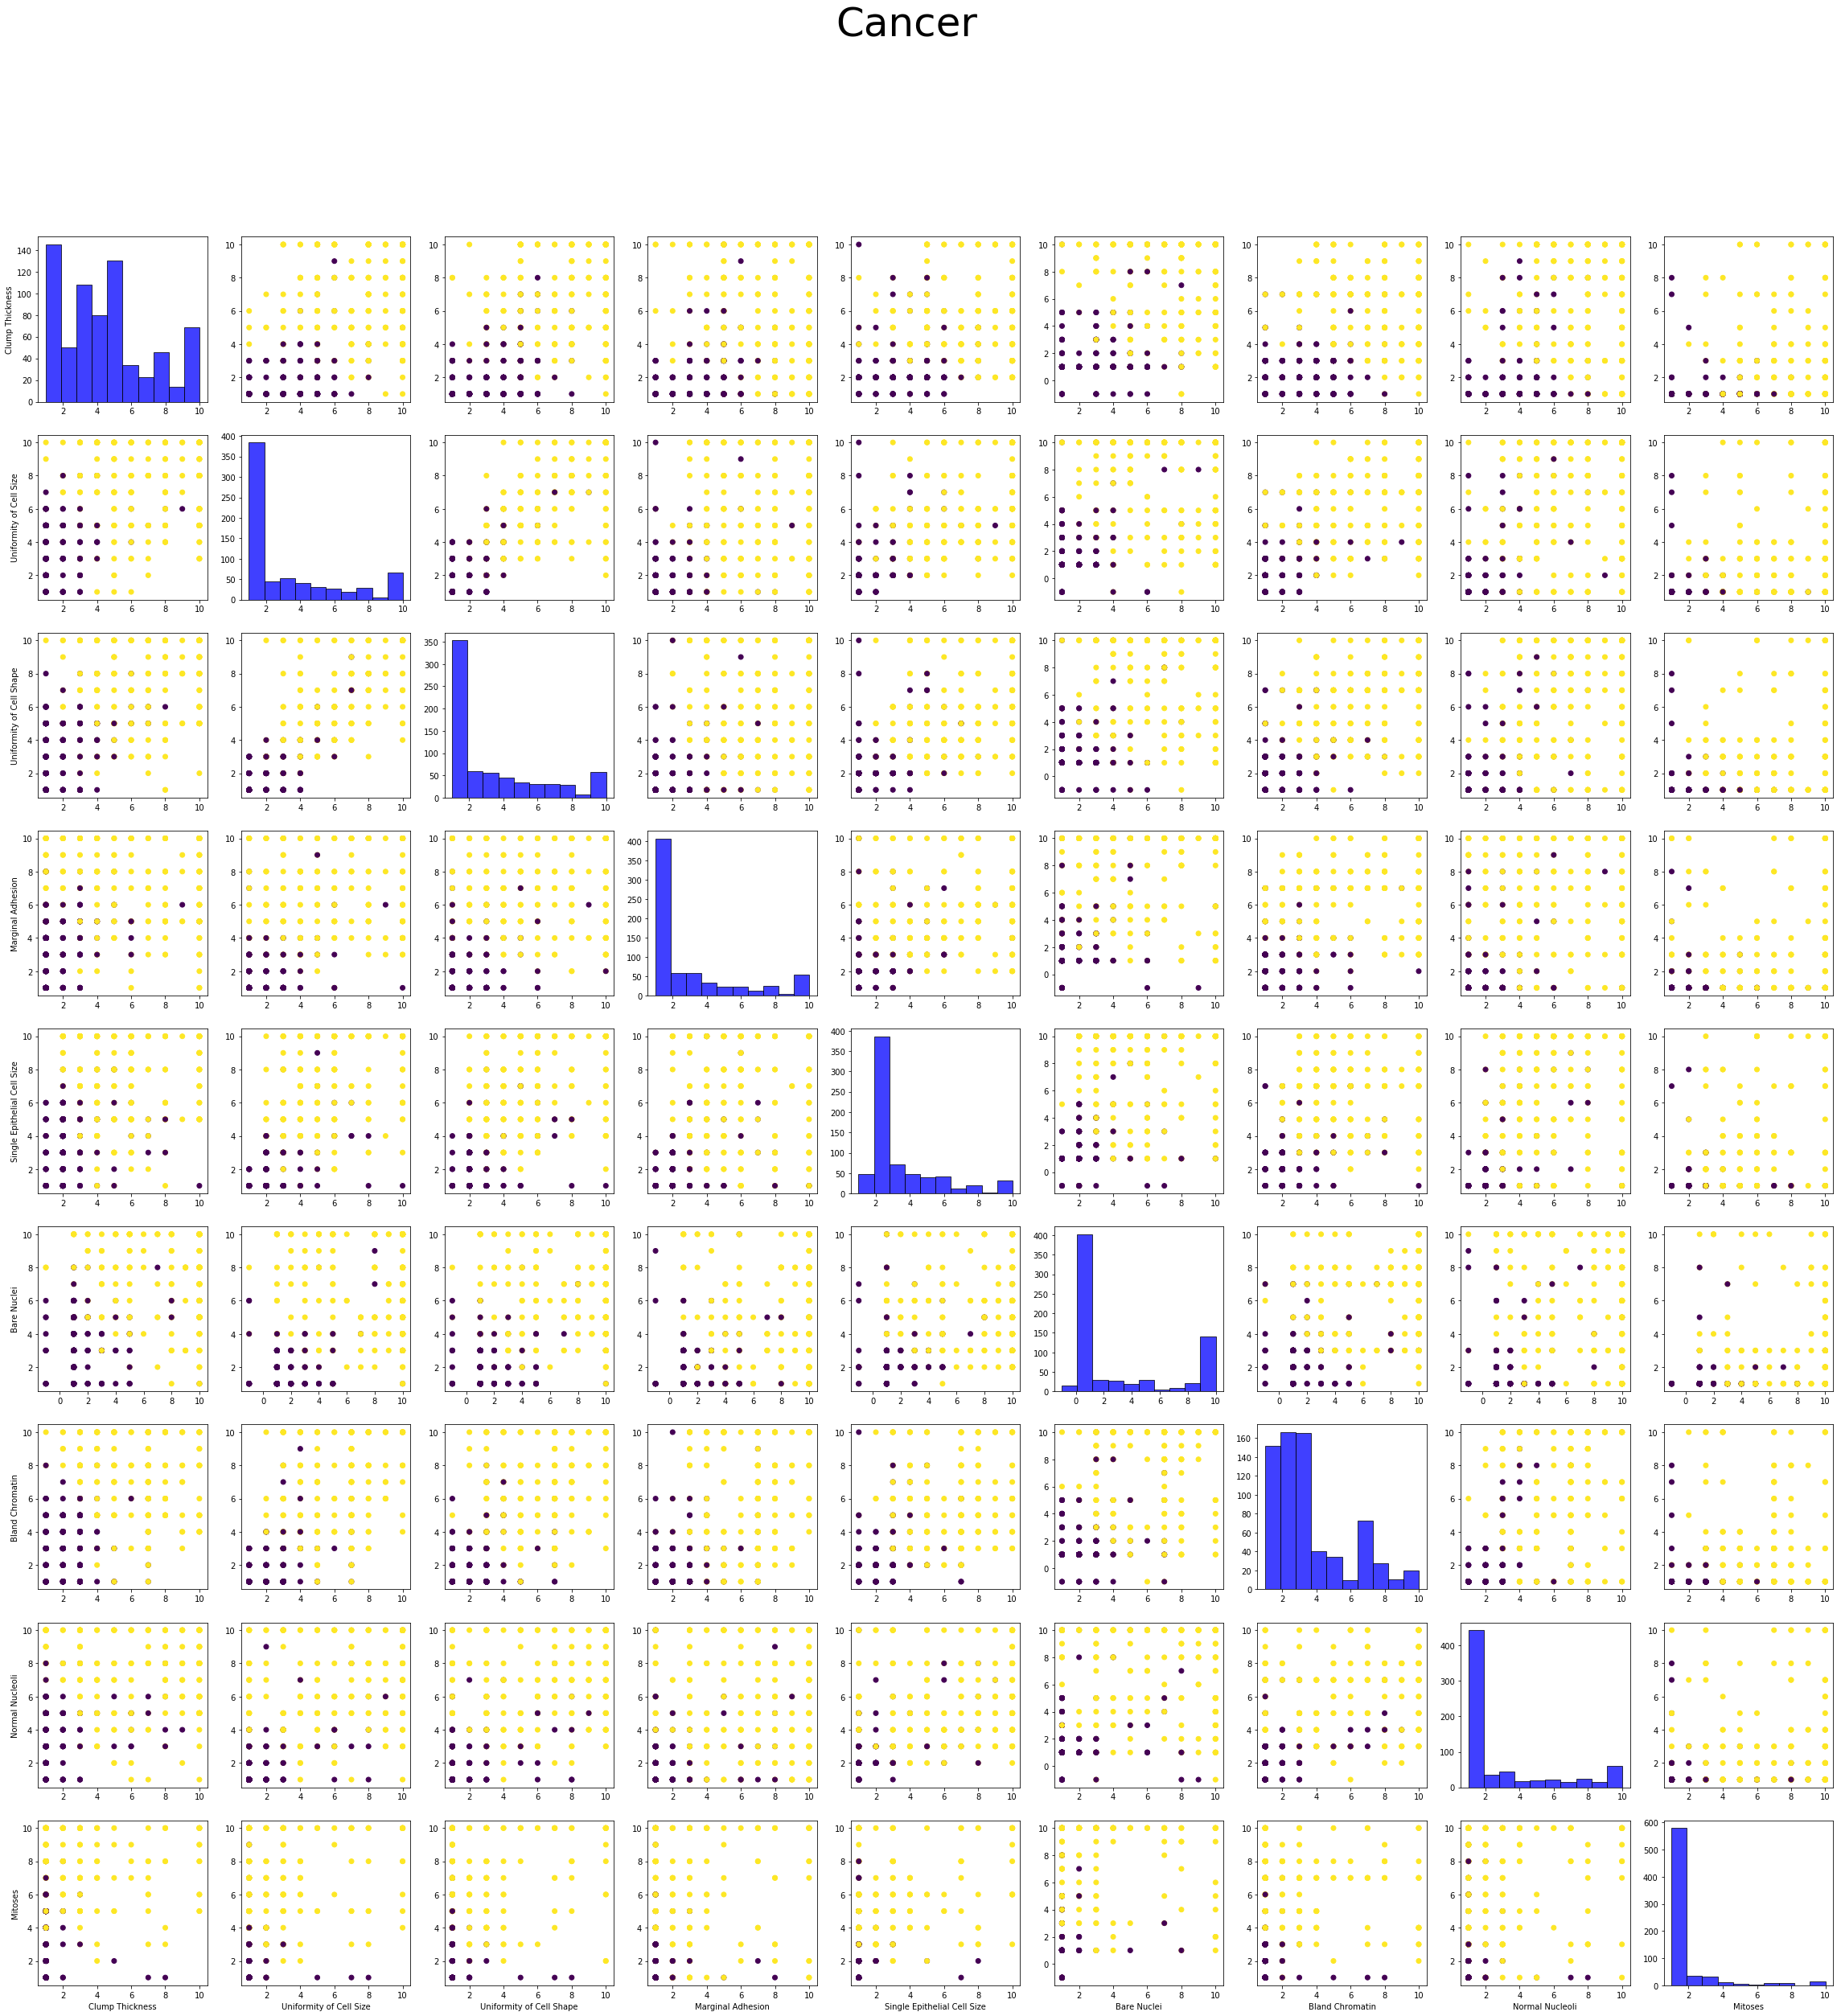

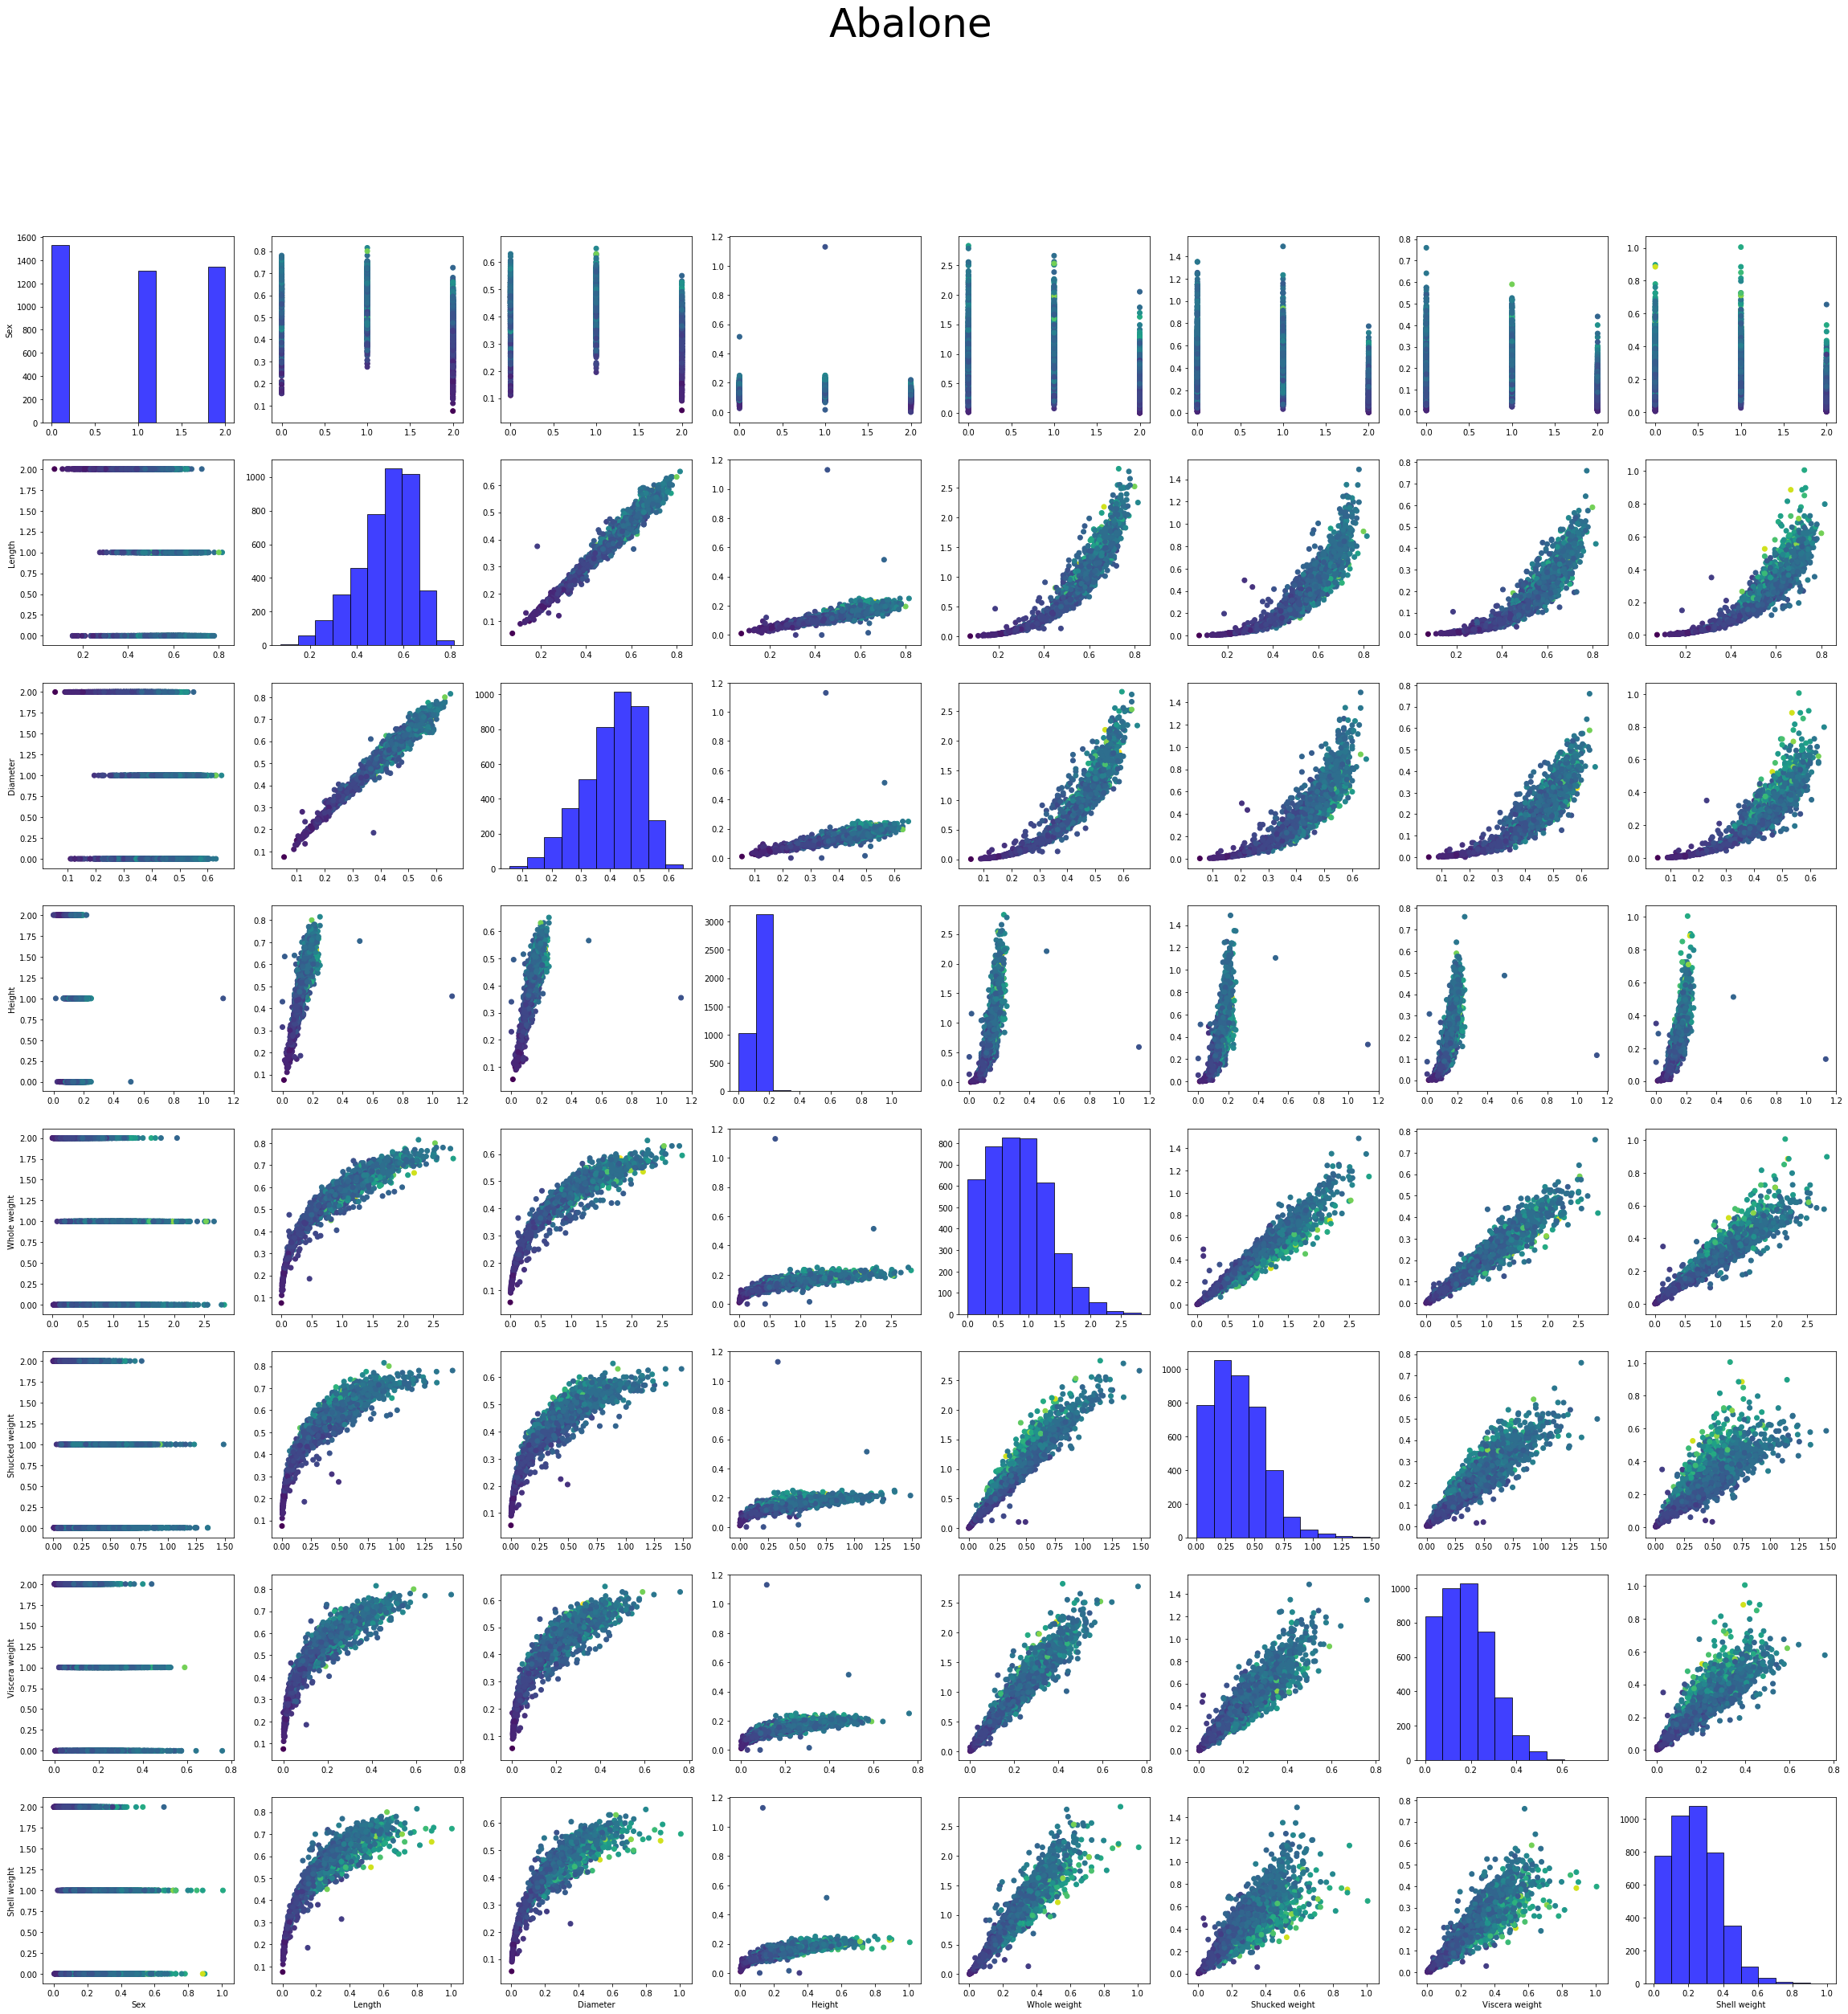

In [171]:
plotData(irisData[:,:4], irisData[:, 4], irisLabel, 'Iris')
plotData(wineData[:,1:13], wineData[:, 0], wineLabel[1:], 'Wine')
plotData(forestData[:,:13], np.zeros(517), forestLabel, 'Forest')
plotData(cancerData[:,1:10], cancerData[:, 10], cancerLabel[1:], 'Cancer')
plotData(abaloneData[:,:8], abaloneData[:, 8], abaloneLabel, 'Abalone')